In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1.9000     ✔ purrr   0.2.4     
✔ tibble  1.3.4          ✔ dplyr   0.7.4     
✔ tidyr   0.7.2          ✔ stringr 1.2.0     
✔ readr   1.1.1.9000     ✔ forcats 0.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
# read the dataset
data <- read_csv("../input/CAERS_ASCII_2004_2017Q2.csv")

head(data)
summary(data)

Parsed with column specification:
cols(
  `RA_Report #` = col_double(),
  `RA_CAERS Created Date` = col_character(),
  `AEC_Event Start Date` = col_character(),
  `PRI_Product Role` = col_character(),
  `PRI_Reported Brand/Product Name` = col_character(),
  `PRI_FDA Industry Code` = col_double(),
  `PRI_FDA Industry Name` = col_character(),
  `CI_Age at Adverse Event` = col_double(),
  `CI_Age Unit` = col_character(),
  CI_Gender = col_character(),
  `AEC_One Row Outcomes` = col_character(),
  `SYM_One Row Coded Symptoms` = col_character()
)


RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER, REQ. INTERVENTION TO PRVNT PERM. IMPRMNT., HOSPITALIZATION","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITALISATION, DYSPNOEA"
65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER, REQ. INTERVENTION TO PRVNT PERM. IMPRMNT., HOSPITALIZATION","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITALISATION, DYSPNOEA"
65333,1/1/2004,NA,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP ICE CREAM,13,Ice Cream Prod,NA,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
65336,1/1/2004,NA,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NA,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"
65345,1/1/2004,12/21/2003,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING


  RA_Report #     RA_CAERS Created Date AEC_Event Start Date PRI_Product Role  
 Min.   : 65325   Length:90786          Length:90786         Length:90786      
 1st Qu.:125985   Class :character      Class :character     Class :character  
 Median :168433   Mode  :character      Mode  :character     Mode  :character  
 Mean   :156578                                                                
 3rd Qu.:190411                                                                
 Max.   :214610                                                                
                                                                               
 PRI_Reported Brand/Product Name PRI_FDA Industry Code PRI_FDA Industry Name
 Length:90786                    Min.   : 2.00         Length:90786         
 Class :character                1st Qu.:29.00         Class :character     
 Mode  :character                Median :54.00         Mode  :character     
                                 Mean   :43.06      

In [8]:
data <- data %>% filter(CI_Gender %in% list("Male", "Female"))
sex <- table(data$CI_Gender)
sex


Female   Male 
 58924  26943 

In [9]:
chisq.test(sex)


	Chi-squared test for given probabilities

data:  sex
X-squared = 11911, df = 1, p-value < 2.2e-16


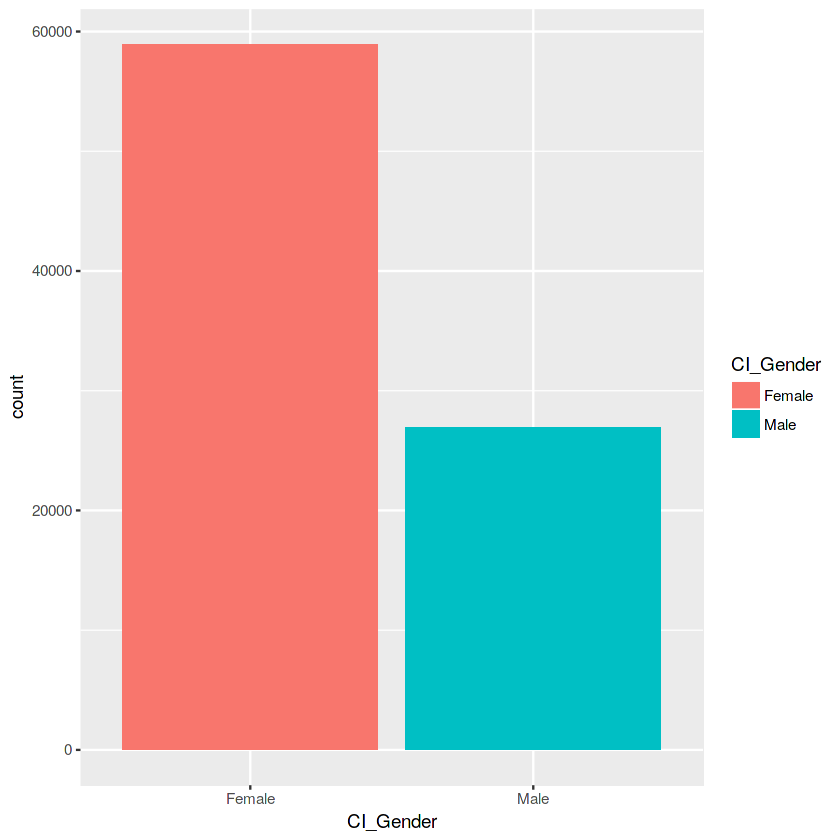

In [10]:
data %>%
    ggplot(aes(CI_Gender, fill=CI_Gender)) +
    geom_bar()